係数 [1.11450326 1.95737004 3.00295751]
(1,1)の時の予測値 [6.07483081]


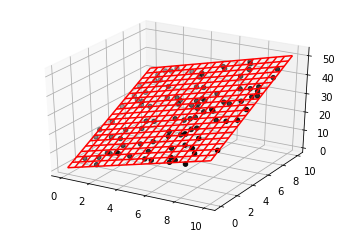

In [62]:
# 2変数の回帰分析
import linearreg
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# データの準備
n = 100
scale = 10
np.random.seed(0)
X = np.random.random((n,2)) * scale # 0以上1未満の乱数を10倍 = 0以上10未満の乱数
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1*X[:,0] + w2*X[:,1] + np.random.randn(n)

# 当てはめと予測
model = linearreg.LinearRegression()
model.fit(X, y)
print("係数", model.w_)
print("(1,1)の時の予測値", model.predict(np.array([1, 1])))

# 描画
xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20),
                           np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:,0], X[:,1], y , color = 'k')
ax.plot_wireframe(xmesh, ymesh, zmesh, color = 'r')
plt.show()

In [63]:
# 実践的な回帰
import linearreg
import csv

# データの読み込み
Xy = []
with open("winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter=";"): # セミコロンで区切られたデータなのでこのような処理を行なっている
        Xy.append(row)
Xy = np.array(Xy[1:], dtype = np.float64) # 不必要なカラム名情報（１行目）を削除している

# 訓練データとテストデータに分類
np.random.seed(0)
np.random.shuffle(Xy)
train_X = Xy[:-1000, :-1] # 最後の列が目的変数なのでそれ以外を取得
train_y = Xy[:-1000, -1]  # 最後の列が目的変数なのでそこだけ取得
test_X  = Xy[-1000:, :-1]
test_y  = Xy[-1000:, -1]

# 学習
model = linearreg.LinearRegression()
model.fit(train_X, train_y)

# テストデータにモデルを適用
y =  model.predict(test_X)

for i in range(5):
    print("{:1.0f} {:5.3f}".format(test_y[i], y[i]))
print()
print("RMSE", np.sqrt(((test_y - y)**2).mean()))
print("R^2", 1 - ((test_y - y)**2).sum() / ((test_y - test_y.mean())**2).sum())

7 6.012
6 5.734
5 5.285
8 6.352
5 5.414

RMSE 0.6724248548469225
R^2 0.3390616648235377


In [64]:
# クロスバリデーション法
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression as lm

kf = KFold(n_splits = 5,     # 分割数
           shuffle = True,   # シャッフルの有無
           random_state = 1) # シード値

np.random.shuffle(Xy)
X = Xy[:, :-1] # 最後の列が目的変数なのでそれ以外を取得
y = Xy[:, -1]


for train_index, test_index in kf.split(X, y):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    model = LinearRegression()
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print("score=", score)

score= 0.35703780660121776
score= 0.37259434981611755
score= 0.4349182659860573
score= 0.25514518797764607
score= 0.3262466998008731


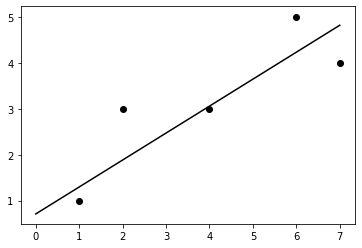

[0.7107438  0.58677686]


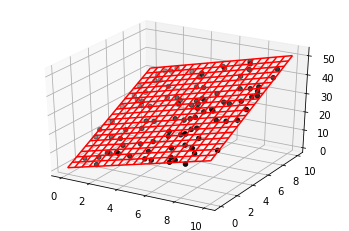

In [65]:
import ridge
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d

x = np.array([1,2,4,6,7])
y = np.array([1,3,3,5,4])
model = ridge.RidgeRegression()
model.fit(x, y)
b, a =  model.w_

plt.scatter(x, y, color="k")
xmax = x.max()
plt.plot([0, xmax], [b, b + a * xmax], color= "k")
plt.show()
print(model.w_)

n = 100
scale = 10

np.random.seed(0)
X = np.random.random((n, 2)) * scale
w0 = 1
w1 = 2
w3 = 3
y  = w0 + w1*X[:, 0] + w2*X[:,1] + np.random.randn(n)   # Xの1列目をx1、2列目をx2として、y = wo + w1x1 + w2x2

model = ridge.RidgeRegression(1.)
model.fit(X, y)

xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20),
                           np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)

fig = plt.figure()
ax  = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], y, color = 'k')
ax.plot_wireframe(xmesh, ymesh, zmesh, color = 'r')
plt.show()


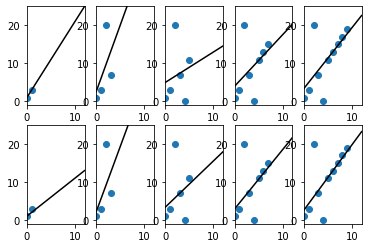

In [66]:
# リッジ回帰のわかりやすい実験
x = np.arange(12)
y = 1 + 2*x
y[2] = 20
y[4] = 0

xmin = 0
xmax = 12
ymin = -1
ymax = 25

fig, ax = plt.subplots(nrows = 2, ncols = 5)
for i in range(5):
    # 描画区画の整備
    ax[0,i].set_xlim([xmin, xmax])
    ax[0,i].set_ylim([ymin, ymax])
    ax[1,i].set_xlim([xmin, xmax])
    ax[1,i].set_ylim([ymin, ymax])
    
    # 散布図の追加
    xx = x[:2 + i * 2]
    yy = y[:2 + i * 2]
    ax[0,i].scatter(xx, yy)
    ax[1,i].scatter(xx, yy)
    
# 通常の回帰線の追加
    model = linearreg.LinearRegression()
    model.fit(xx, yy)
    xs = [xmin, xmax]
    ys = [model.w_[0] + model.w_[1] * xs[0],
          model.w_[0] + model.w_[1] * xs[1]]
    ax[0,i].plot(xs, ys, color='k')

    # リッジ回帰線の追加
    model = ridge.RidgeRegression()
    model.fit(xx, yy)
    xs = [xmin, xmax]
    ys = [model.w_[0] + model.w_[1] * xs[0],
          model.w_[0] + model.w_[1] * xs[1]]
    ax[1,i].plot(xs, ys, color='k')

plt.show()

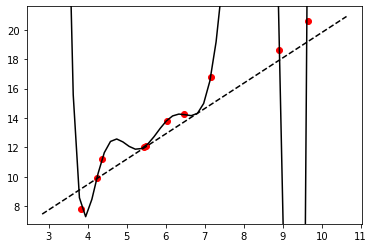

In [67]:
import polyreg
import linearreg
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def f(x):
    return 1 + 2*x
x = np.random.random(10) * 10
y = f(x) + np.random.randn(10)

# 多項式回帰モデルへの当てはめ
model_poly = polyreg.PolymonialRegression(10)
model_poly.fit(x, y)

# 線形回帰モデルへの当てはめ
model_lm = linearreg.LinearRegression()
model_lm.fit(x, y)
b, a = model.w_
x_start = x.min() -1
x_end = x.max() + 1
y_start = a*(x.min()-1) + b 
y_end = a*(x.max()+1) + b

# 予測の計算
xx = np.linspace(x.min() -1, x.max() + 1)
yy = np.array([model_poly.predict(u) for u in xx])

# 可視化
plt.scatter(x, y , color = "r")
plt.ylim([y.min()-1, y.max()+1])
plt.plot(xx, yy, color = "k")
plt.plot([x_start, x_end], [y_start, y_end], color = "k", linestyle = 'dashed')

## 汎化性能

以下の関数の値を線形回帰と多項式回帰を使って予測する
$$
y = \frac{1}{1+x}\qquad(0\leq x \leq5)
$$

以下のような処理を1万回繰り返す  
$\quad$１、$(0\leq x \leq5)$の範囲に５点をランダムに取り、それらについて$f(x) = \frac{1}{1+x}$を計算する  
$\quad$２、上記データにより、線形回帰と多項式回帰をそれぞれ学習させる  
$\quad$３、0から5まで0.01刻みに予測値の平均を、線形回帰と多項式回帰それぞれについて計算し図示する

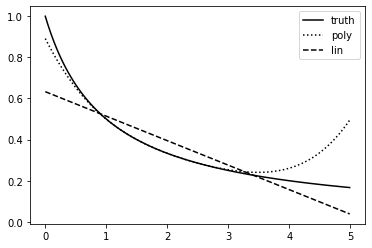

In [90]:
import warnings

def f(x):   # 関数の定義
    return 1 / (1+x)

def sample(k): # サンプリング
    x = np.random.random(k) * 5
    y = f(x)
    return x, y

xx = np.arange(0, 5, 0.01) 
np.random.seed(0)
y_poly_sum = np.zeros(len(xx))
y_lin_sum  = np.zeros(len(xx))

warnings.filterwarnings("ignore")


n = 100000 # 繰り返し回数
k = 5      # ランダムに取得するデータ点のかず

# 繰り返しのプログラム
for _ in range(n):
    x, y = sample(k)
    poly = polyreg.PolymonialRegression(k-1)
    poly.fit(x, y)
    lin  = linearreg.LinearRegression()
    lin.fit(x, y)
    y_poly = poly.predict(xx)
    y_lin  = lin.predict(xx.reshape(-1,1)) # 横ベクトルにしている & 2次元配列にしている
    y_poly_sum += y_poly
    y_lin_sum += y_lin
    poly_mean = y_poly_sum / n # 予測値の平均
    lin_mean  = y_lin_sum / n # 予測値の平均
    
plt.plot(xx, f(xx),     label = "truth", color = "k", linestyle = "solid")  # 実際のデータを可視化 = 真の値
plt.plot(xx, poly_mean, label = "poly",  color = "k", linestyle = "dotted") # 多項式回帰での予測値
plt.plot(xx, lin_mean,  label = "lin",   color = "k", linestyle = "dashed") # 線形回帰での予測値
plt.legend()
plt.show()

In [129]:
# バイアスとバリアンスを可視化してみる
np.random.seed()
# 結果を格納する配列を用意
y_poly_sum = np.zeros(len(xx))
y_poly_var = np.zeros(len(xx))
y_lin_sum  = np.zeros(len(xx))
y_lin_var  = np.zeros(len(xx))

y_true = f(xx)
n = 100000
k = 5

warnings.filterwarnings("ignore")

for _ in range(n):
    x, y = sample(k)
    poly = polyreg.PolymonialRegression(k-1)
    poly.fit(x, y)
    lin  = linearreg.LinearRegression()
    lin.fit(x, y)
    y_poly = poly.predict(xx)
    y_lin  = lin.predict(xx.reshape(-1,1))
    y_poly_sum += y_poly
    y_lin_sum  += y_lin
    y_poly_var += (y_poly - y_true)**2
    y_lin_var  += (y_lin  - y_true)**2

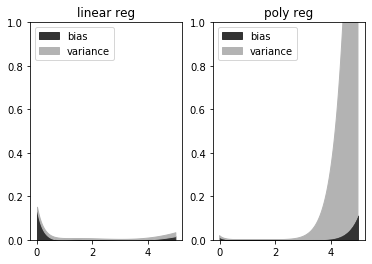

In [130]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("linear reg")
ax2.set_title("poly reg")
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)

ax1.fill_between(xx, 0, (y_true - y_lin_sum / n) ** 2, color = "0.2", label = "bias")
ax1.fill_between(xx, (y_true - y_lin_sum / n) ** 2, y_lin_var / n, color = "0.7", label = "variance")
ax1.legend(loc = "upper left")

ax2.fill_between(xx, 0, (y_true - y_poly_sum / n) ** 2, color = "0.2", label = "bias")
ax2.fill_between(xx, (y_true - y_poly_sum / n) ** 2, y_poly_var / n , color = "0.7", label = "variance")
ax2.legend(loc = "upper left")

plt.show()

In [3]:
# ラッソ回帰
import lasso
import numpy as np
import csv

Xy = []
with open("winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter = ";"):
        Xy.append(row)

Xy = np.array(Xy[1:], dtype = np.float64) 

# 訓練用データとテストデータに分ける
np.random.seed(0)
np.random.shuffle(Xy)
train_X = Xy[:-1000, :-1]
train_y = Xy[:-1000, -1]
test_X = Xy[-1000:, :-1]
test_y = Xy[-1000:, -1]

#　ハイパーパラメータを変えながら学習させて結果表示
for lambda_ in [1., 0.1, 0.01]:
    model = lasso.Lasso(lambda_)
    model.fit(train_X, train_y)
    y = model.predict(test_X)
    print("--- lambda = {} ---".format(lambda_))
    print("coefficientds:")
    print(model.w_)
    mse = ((y - test_y)**2).mean()
    print("MSE: {:.3f}".format(mse))

--- lambda = 1.0 ---
coefficientds:
[ 5.58430718  0.         -0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.          0.        ]
MSE: 0.691
--- lambda = 0.1 ---
coefficientds:
[ 5.73493612  0.         -0.1407455   0.34369322 -0.         -2.00071813
  0.         -0.         -0.          0.          0.          0.        ]
MSE: 0.636
--- lambda = 0.01 ---
coefficientds:
[ 5.71424724  0.         -1.01439751  0.00742223  0.         -3.34228417
  0.         -0.          0.          0.          1.04248618  0.        ]
MSE: 0.539


In [1]:
# ロジスティック回帰
import logisticreg
import csv
import numpy as np

n_test = 100
X = []
y = []
with open("wdbc.data") as fp:
    for row in csv.reader(fp): # csv.readerオブジェクトをイテレータとして使っている
        if row[1] == "B":      # 1列目に目的変数があるので取得し、判定
            y.append(0)
        else:
            y.append(1)
        X.append(row[2:])      # 2列目以降は説明変数なのでX行列に追加

# 訓練データとテストデータに分ける
y = np.array(y, dtype=np.float64)
X = np.array(X, dtype=np.float64)
y_train = y[:-n_test] # 後半100個を除く
X_train = X[:-n_test]
y_test  = y[-n_test:] # 後半100個
X_test  = X[-n_test:]

model = logisticreg.LogisticRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
n_hits = (y_test == y_predict).sum()
print("Accuracy: {}/{} = {}".format(n_hits, n_test, n_hits/n_test))

Accuracy: 97/100 = 0.97


/work/ml.essence/logisticreg.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [ ]:
# SVM
# 1,初期値a0を選ぶ
# 2,ある基準に基づきインデックスi,jを選択する（サポートベクターの選択）
# 3,a_iとa_jだけを動かして、他を固定して最適なa_i、a_jを求める
# 4,2~3を繰り返す

import numpy as np
from operator import itemgetter

class SVC:
    def fit(self, X, y, selectiions = None):
        a = np.zeros(X.shape[0])  # 初期値の設定、データ点と同じ数だけaを設定sしてベクトル化。
        ay = 0
        ayx = np.zeros(X.shape[0])
        yx = y.reshape(-1,1) * X 
        indices = np.arange(X.shape[0])
        while Ture:
            ydf = y * (1 - np.dot(yx, ayx.T))  # ∇f(α)_t　の計算
            iydf = np.c_[indices, ydf]         # iとjのargminとargmaxを求める
            i = int(min(iydf[(y < 0) | (a > 0)], key = itemgetter(1)
                       )[0]
                   )
            j = int(min(iydf[(y > 0) | (a > 0)], key = itemgetter(1)
                       )[0]
                   )
            if ydf[i] >= ydf[j]:
                break
            ay2 = ay - y[i]*a[i] - y[j]*a[j]
            ayx2 = ayx - y
            

# v = np.array([[2,2,3],[4,1,6],[3,2,1]])
# print(min(v, key = itemgetter(1)))       # min(, key=itemgetter(1))で各配列のindex=1が最小である配列を取得する
# print(min(v, key = itemgetter(1))[0])    # 上記で取得した配列のindex=0の値を取得する
# print(np.argmin(v))                      # np.argminは平坦化した上で最小値のindexを取得する

In [63]:
# k-mean法:クラスタリング
'''
アルゴリズム
1,各点x_iに対して、ランダムにクラスタを割り振る
2,収束するまで以下を繰り返す -> 収束とは各店のクラスタ割り当てが変化しなくなることor変化が一定割合であること
 2_1,各クラスタに割り当てられた点について重心を計算する
 2_2,各点について、上記で計算された重心からの距離を計算し、距離が一番近いクラスタに割り当てなおす
'''





In [5]:
# ユークリッド距離でのクラスター毎の重心計算
X = np.array([[1,2],
              [2,3],
              [3,4],
              [4,5],
              [5,6],
              [6,7],
              [7,9]])
labels = np.array([0,1,2,0,1,2,0])

# ０クラスタに属するデータだけ取り出す
X[labels == 0, :] # Xのlabelが0の行について、全列取得
# 0クラスタの重心
X[labels == 0, :].mean(axis = 0)

array([4.        , 5.33333333])

In [6]:
# クラスタの重心が与えられている場合

# 重心座標を作成
cluster_centers = np.array([[1,1],
                            [2,2],
                            [3,3]])
# 重心と各データ点の距離の二乗を計算
((X[:, :, np.newaxis] # ３次元目を作成している -> 重心との距離を格納する 
 - cluster_centers.T[np.newaxis, :, :]) **2).sum(axis=1) # **2.sumでユークリッド距離（三平方の定理）を計算

array([[  1,   1,   5],
       [  5,   1,   1],
       [ 13,   5,   1],
       [ 25,  13,   5],
       [ 41,  25,  13],
       [ 61,  41,  25],
       [100,  74,  52]])

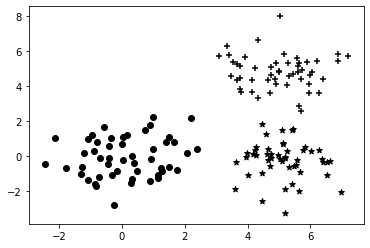

In [2]:
import matplotlib.pyplot as plt
import kmeans
import numpy as np

np.random.seed(123)
points1 = np.random.randn(50,2) 
points2 = np.random.randn(50,2)  + np.array([5,0]) # 1にx軸のみ５を加えた
points3 = np.random.randn(50,2)  + np.array([5,5]) # 1にx軸,y軸双方に５を加えた
points = np.r_[points1, points2, points3]
np.random.shuffle(points)

k = 3

model = kmeans.KMeans(3)
model.fit(points)

# 描画
markers = ["+", "*", "o"]
for i in range(k):
    p = points[model.labels_ == i, :]
    plt.scatter(p[:,0], p[:,1], color = "k", marker = markers[i])
    
plt.show()

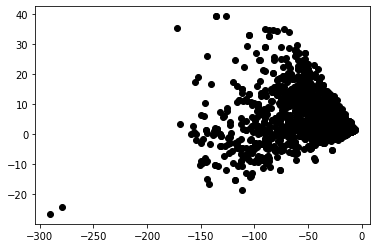

In [2]:
import matplotlib.pyplot as plt
import csv
import pca
import numpy as np

Xy = []
with open("winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter = ";"):
        Xy.append(row)

Xy = np.array(Xy[1:], dtype = np.float64) # 1行目のヘッダーを除く
X = Xy[:, :-1]                            # 最後のqualityカラムを落とす

model = pca.PCA(n_components = 2)
model.fit(X)

Y = model.transform(X)

plt.scatter(Y[:, 0], Y[:,1], color = 'k')
plt.show()